<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
# from apps.lib import Sensor
# from apps.score import ScoreBoard
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
result_df = pd.read_csv('CSV/song1_result.csv')
result_df

,train_who,train_porder,train_score,valid_who,valid_porder,valid_score,test_who,test_porder,test_score,multi_error
0,1,1,243400,1,1,243400,1,1,243400,0.0000
1,1,1,243400,1,1,243400,1,2,223010,0.1850
2,1,1,243400,1,1,243400,1,3,181870,0.1493
3,1,1,243400,1,1,243400,2,1,210550,0.2715
4,1,1,243400,1,1,243400,2,2,251930,0.3534
5,1,1,243400,1,1,243400,2,3,223700,0.3436
6,1,1,243400,1,1,243400,3,1,110320,0.2809
7,1,1,243400,1,1,243400,3,2,122580,0.2780
8,1,1,243400,1,1,243400,3,3,112370,0.1962
9,1,1,243400,1,1,243400,4,1,222600,0.4922


In [3]:
ming_df = result_df[(result_df['train_who'] == result_df['test_who'])
                    & (result_df['train_who'] == result_df['valid_who'])]

In [4]:
ming_df

,train_who,train_porder,train_score,valid_who,valid_porder,valid_score,test_who,test_porder,test_score,multi_error
0,1,1,243400,1,1,243400,1,1,243400,0.0000
1,1,1,243400,1,1,243400,1,2,223010,0.1850
2,1,1,243400,1,1,243400,1,3,181870,0.1493
24,1,1,243400,1,2,223010,1,1,243400,0.0000
25,1,1,243400,1,2,223010,1,2,223010,0.1543
26,1,1,243400,1,2,223010,1,3,181870,0.1706
48,1,1,243400,1,3,181870,1,1,243400,0.0000
49,1,1,243400,1,3,181870,1,2,223010,0.1814
50,1,1,243400,1,3,181870,1,3,181870,0.1413
576,1,2,223010,1,1,243400,1,1,243400,0.1486


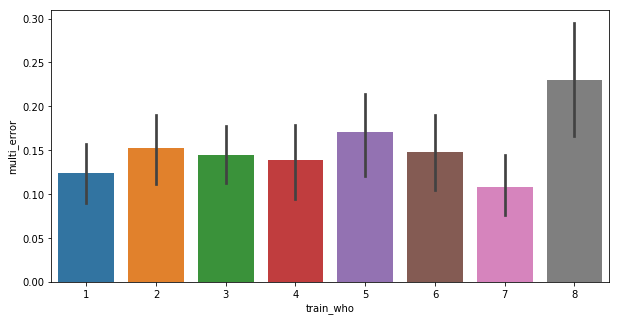

In [5]:
plt.figure(figsize=(10, 5))
sns.barplot(y='multi_error', x='train_who', data=ming_df)
plt.show()

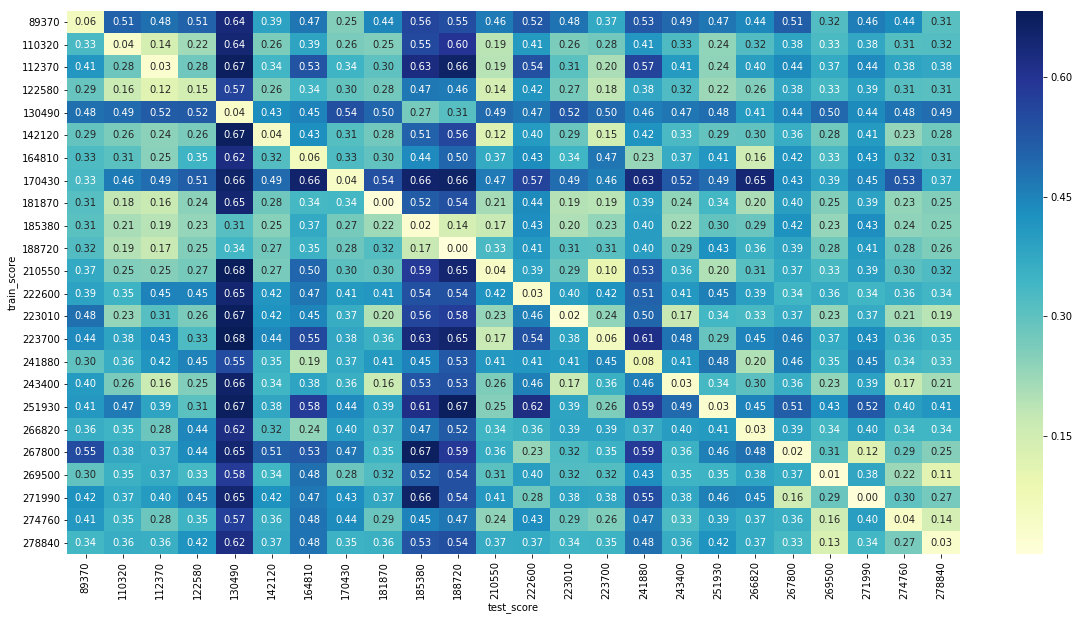

In [6]:
df = result_df.groupby(['train_score', 'test_score'])['multi_error'].mean().reset_index()
plt.figure(figsize=(20, 10))
sns.heatmap(df.pivot('train_score', 'test_score', 'multi_error'), annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()

<Figure size 1440x720 with 0 Axes>

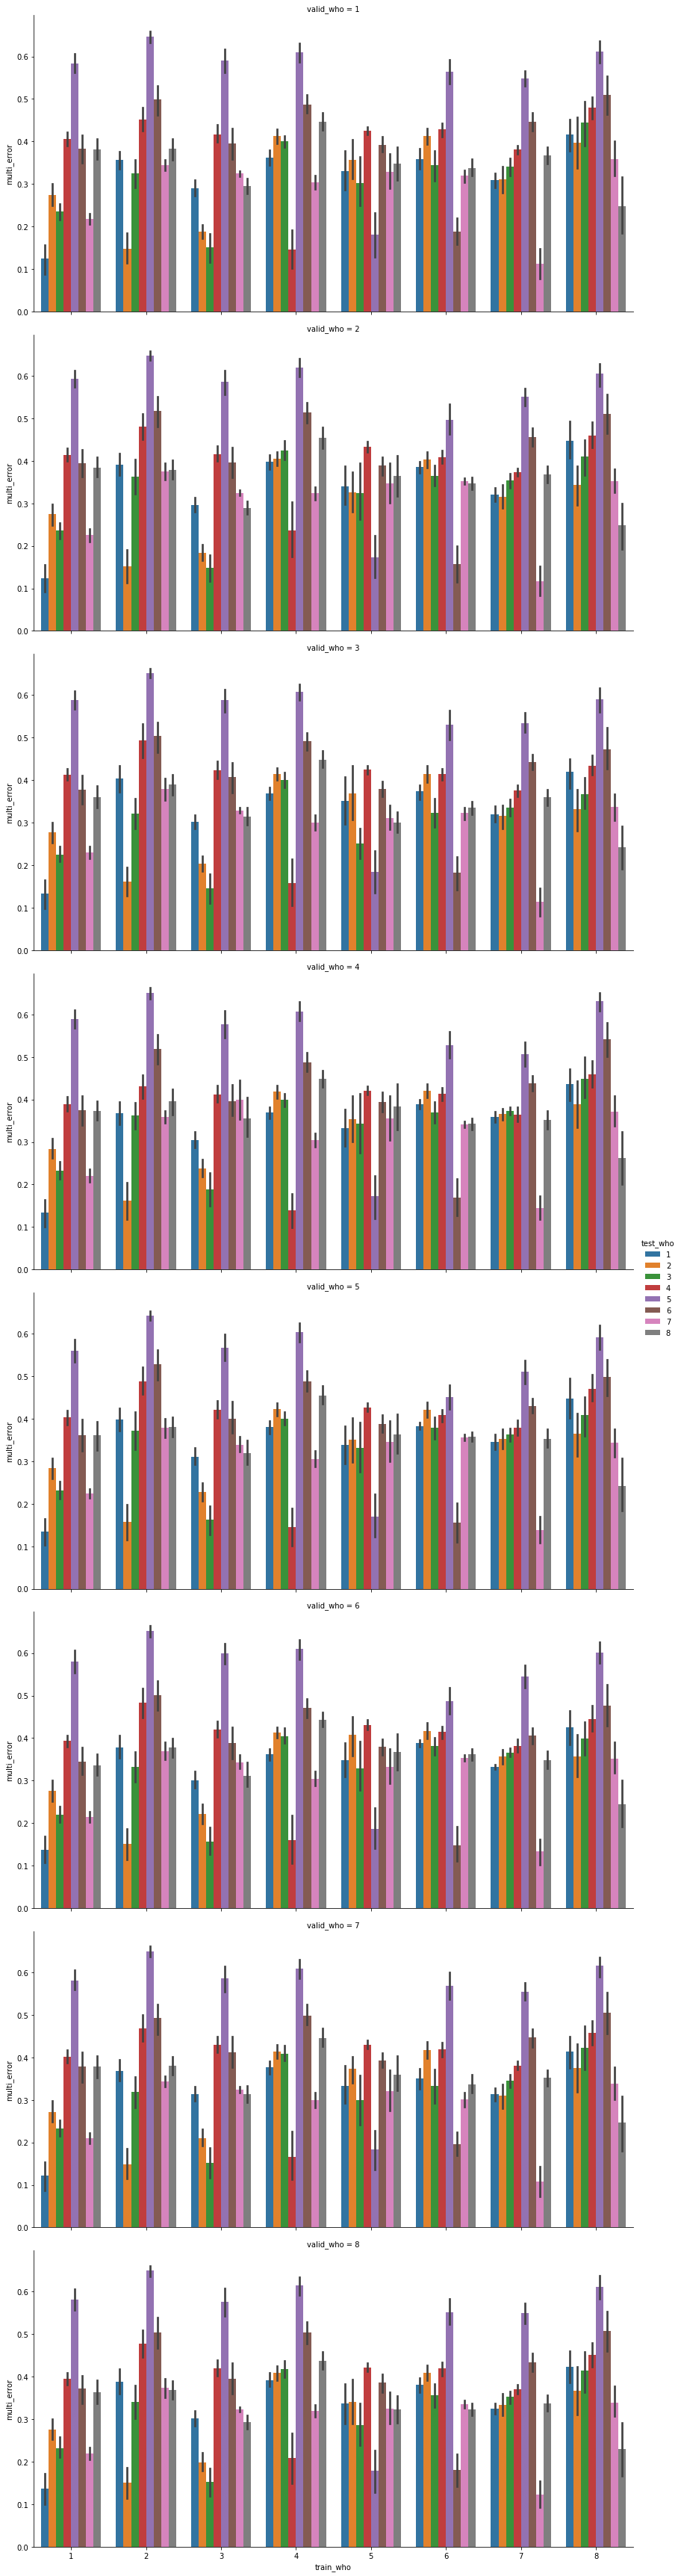

In [7]:
plt.figure(figsize=(20, 10))
sns.catplot(y='multi_error', x='train_who', data=result_df, hue='test_who', row='valid_who', kind='bar', height=6, aspect=2)
plt.show()